In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
from dsn.util.systems import SCCircuit
from dsn.util.dsn_util import get_savedir
from dsn.util.plot_util import assess_constraints, plot_opt, dsn_pairplots, \
                               pairplot, lin_reg_plot
from tf_util.stat_util import approx_equal
import matplotlib.backends.backend_pdf

batch_size 272
c 1.001029373356104
sigma 3.09
AL_fac 4.418660581054718
max_iters 7895
[None]
0 3119


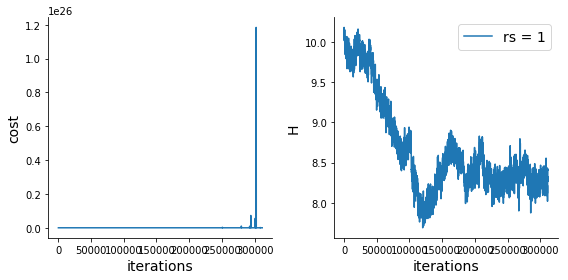

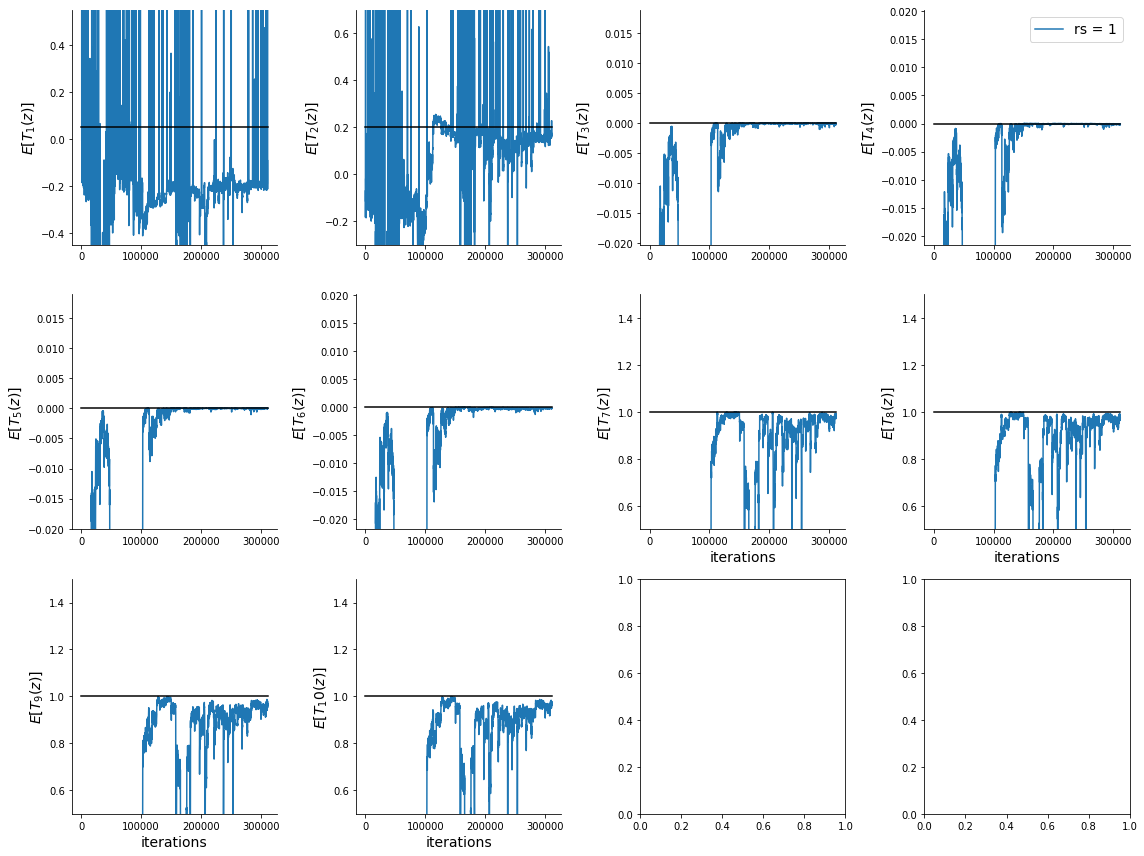

p values
0


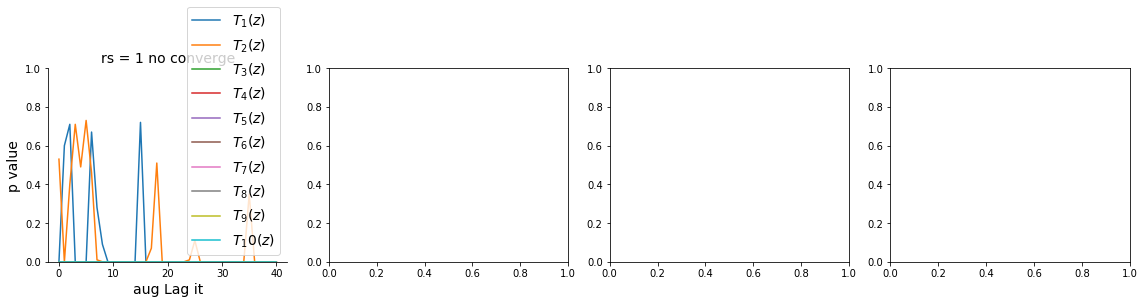

batch_size 693
c 9.383867792390006
sigma 3.18
AL_fac 9.581844892223025
max_iters 6099
[None]
0 1625


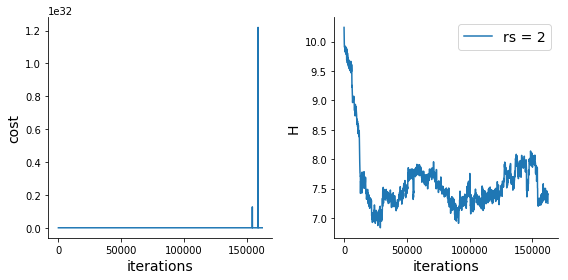

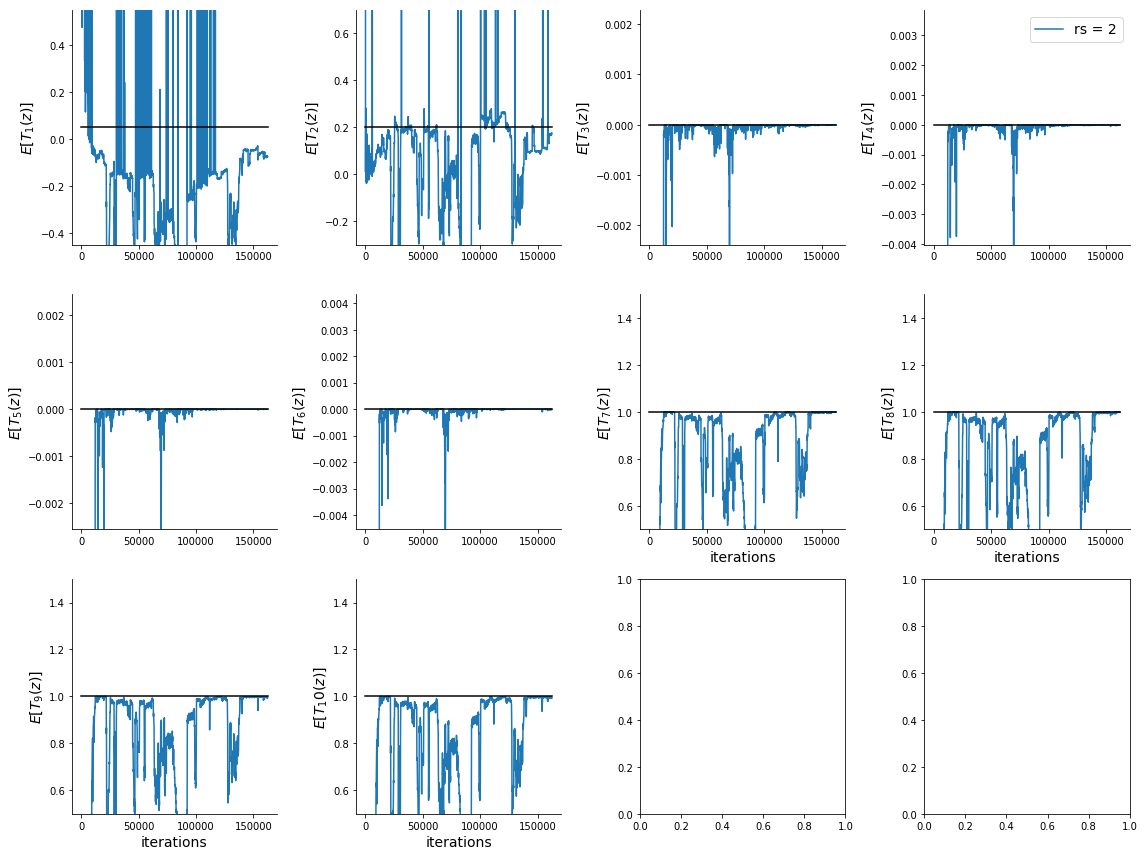

p values
0


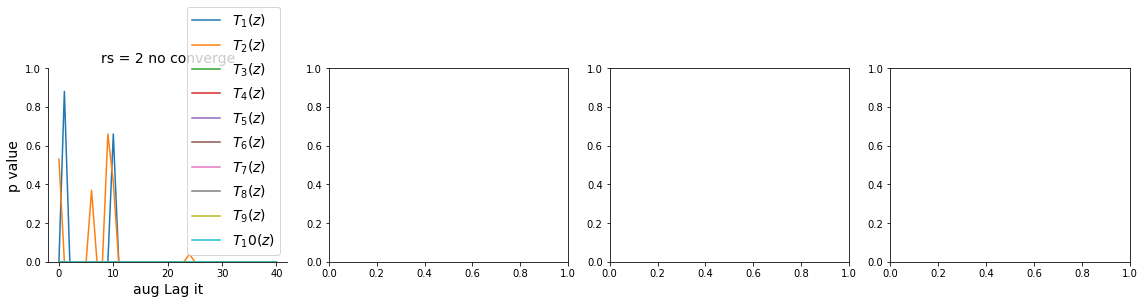

batch_size 449
c 8.559541393951644
sigma 3.75
AL_fac 2.9706286496417285
max_iters 13981
[None]
0 2375


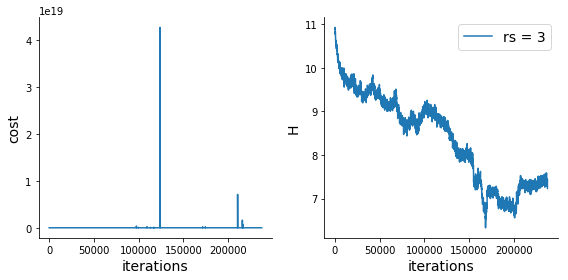

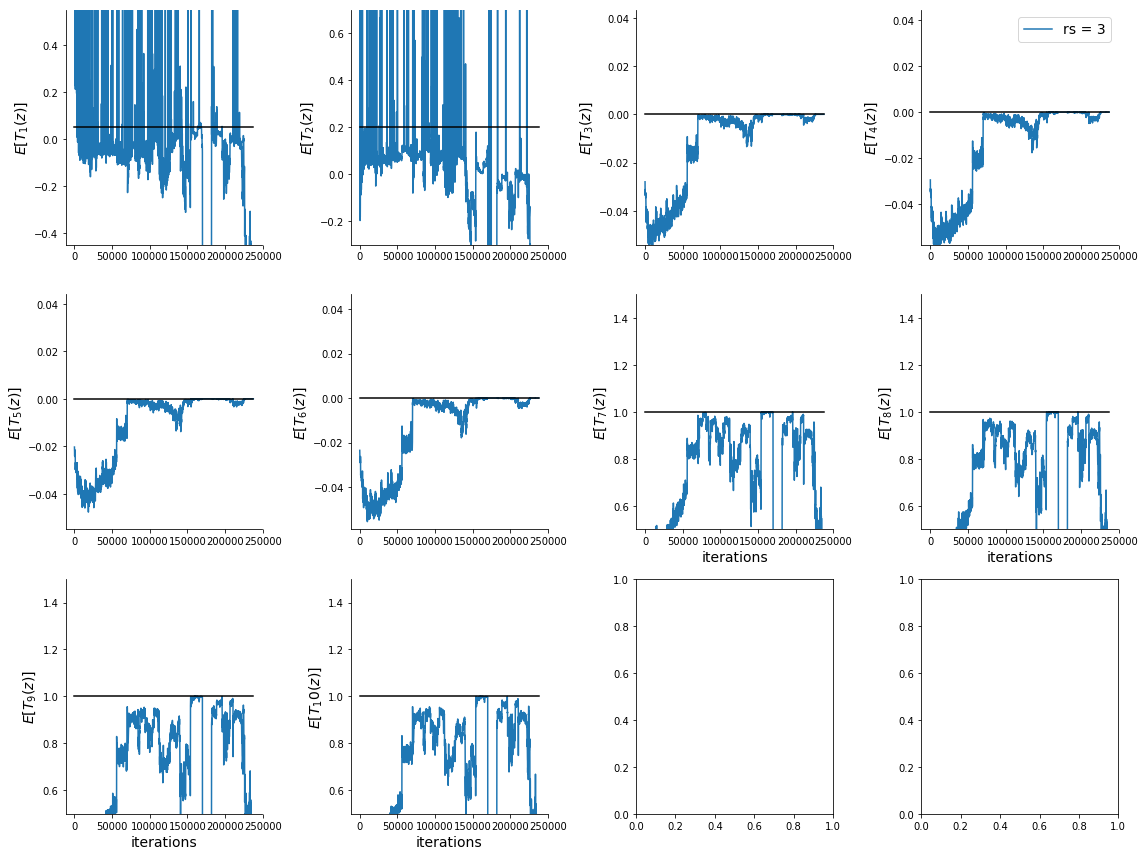

p values
0


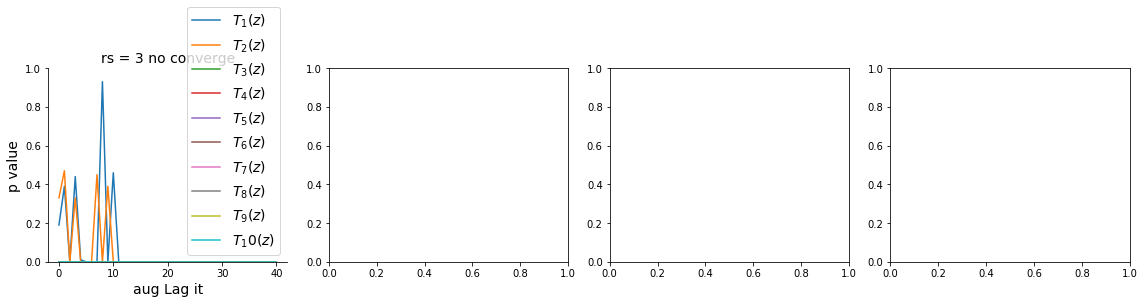

batch_size 639
c 2.5542579796475113
sigma 5.84
AL_fac 8.84496758668518
max_iters 5456
[None]
0 1740


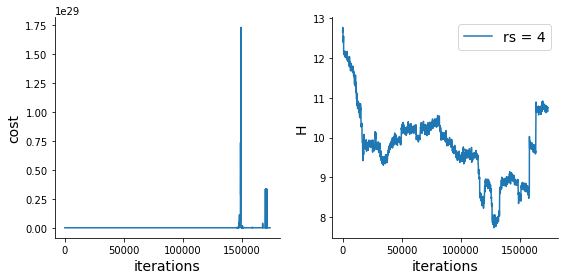

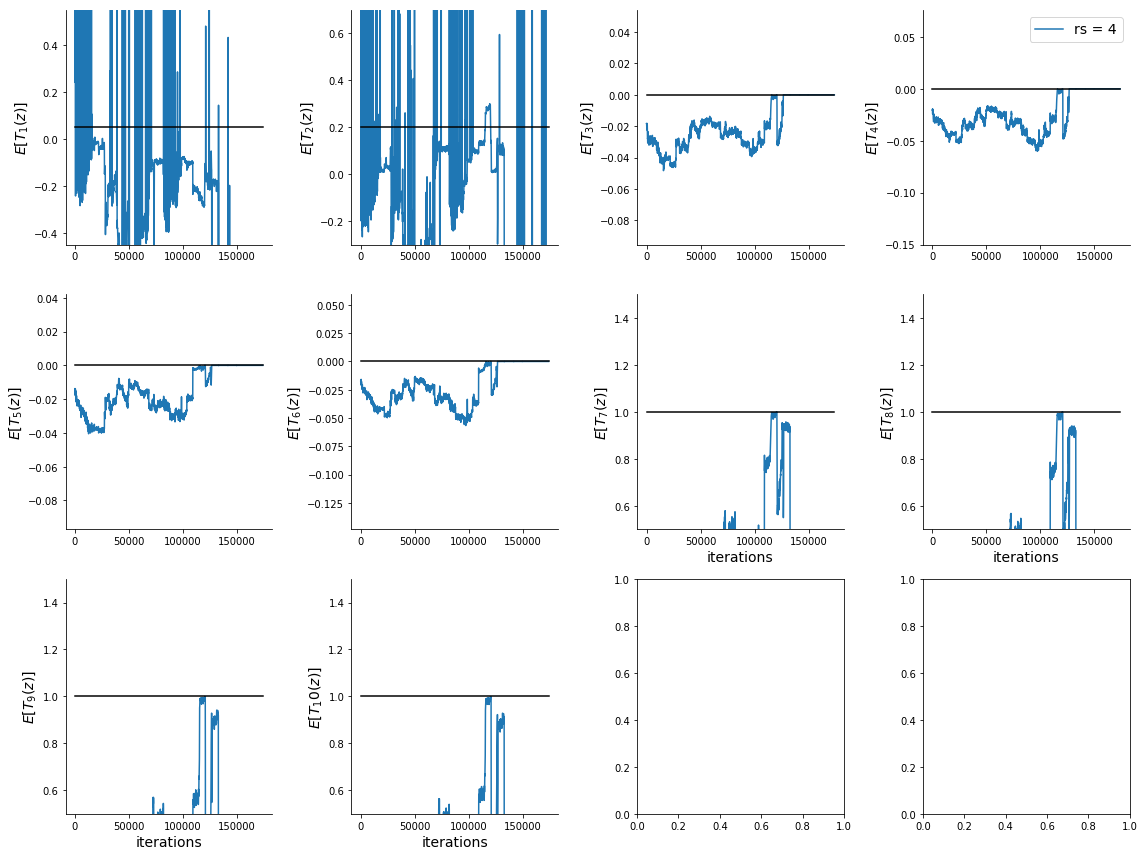

p values
0


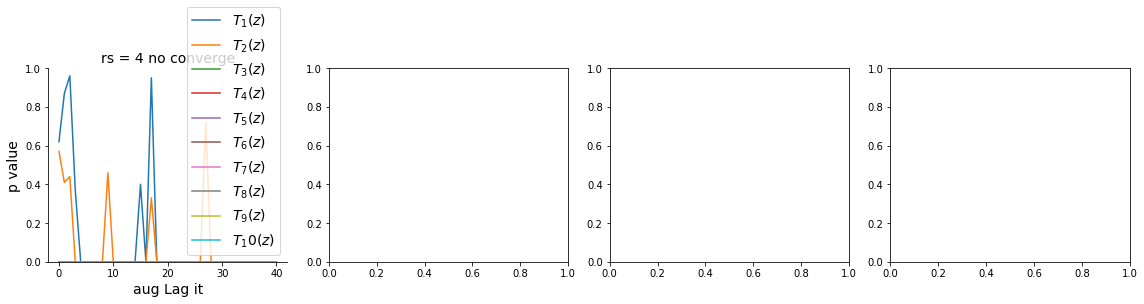

batch_size 901
c 2.8604723980548377
sigma 2.11
AL_fac 9.348887263503372
max_iters 6032
[None]
0 1284


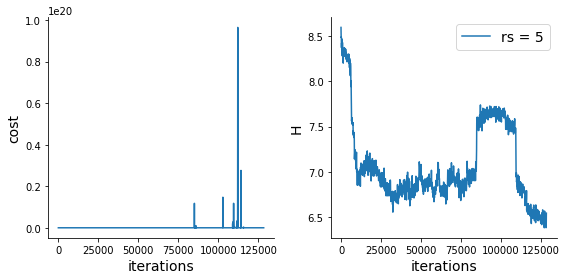

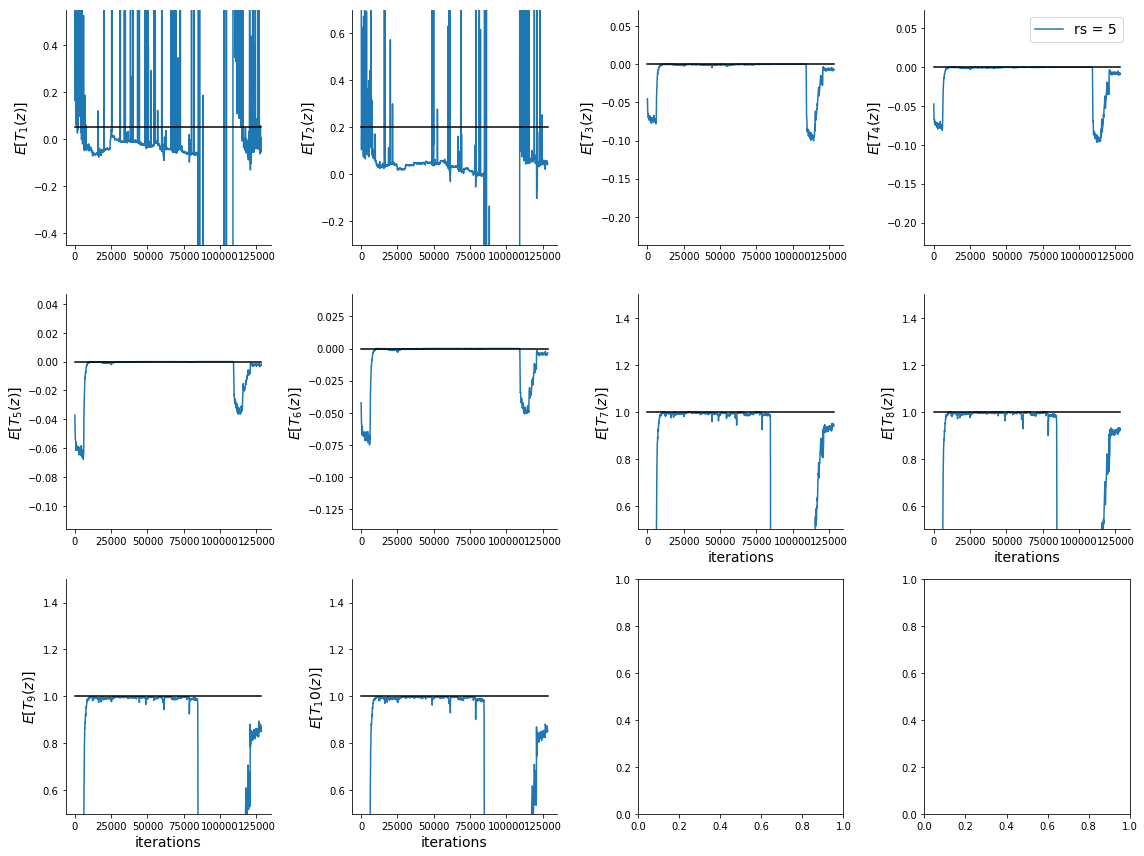

p values
0


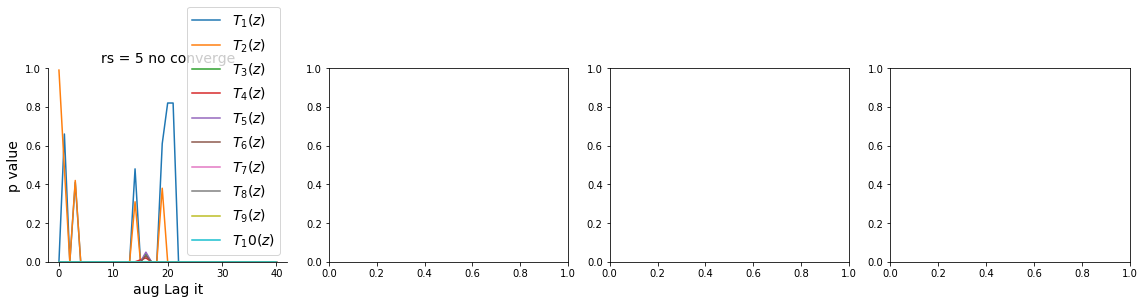

batch_size 427
c 2.8846573039223404
sigma 5.46
AL_fac 2.514036836725272
max_iters 14040
[None]
0 2495


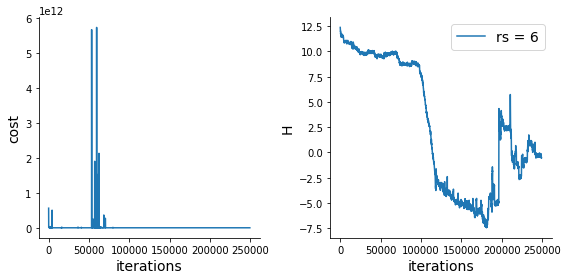

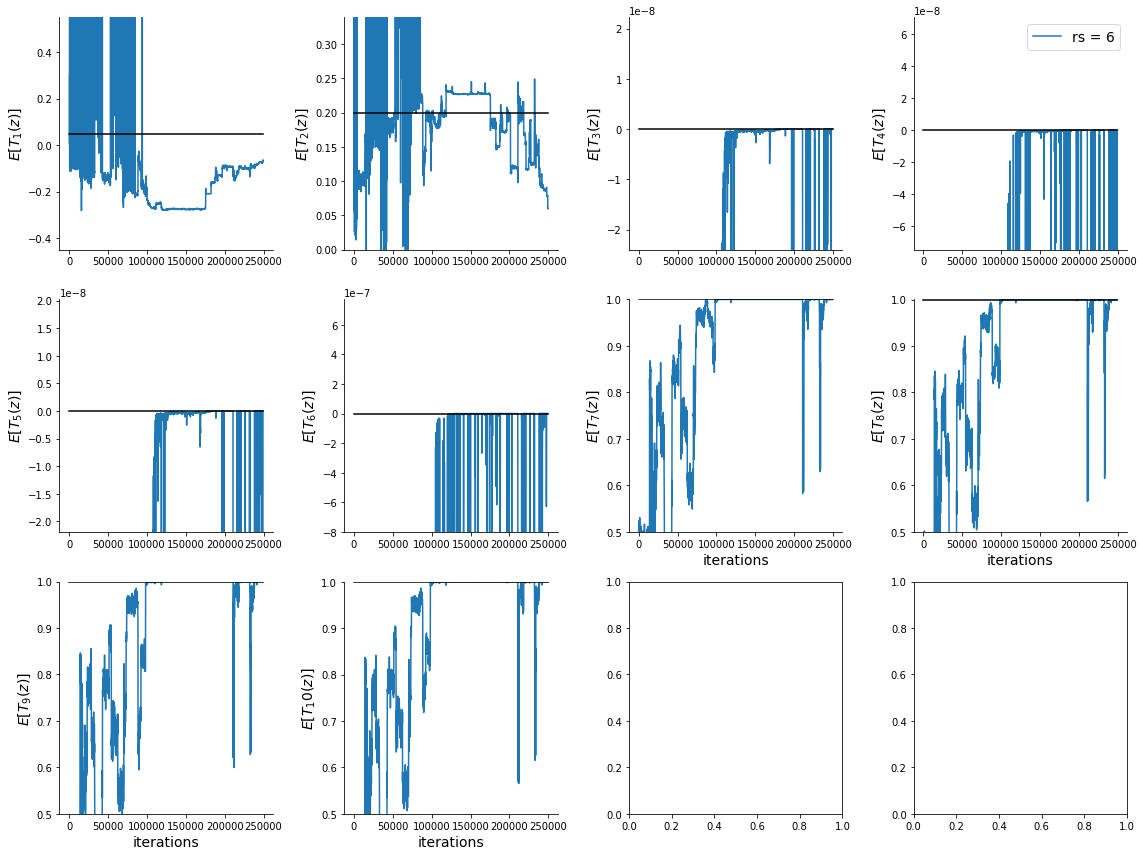

p values
0


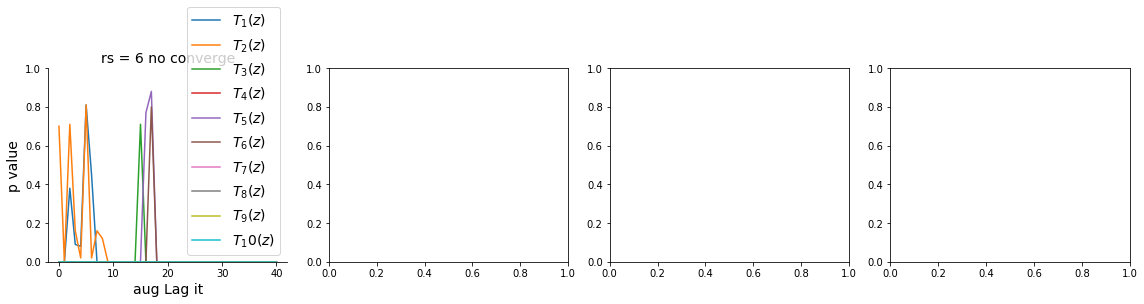

batch_size 737
c 3.870750031960629
sigma 1.38
AL_fac 9.82578317662866
max_iters 18927
[None]
0 1546


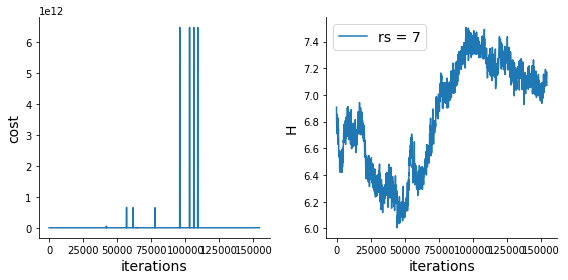

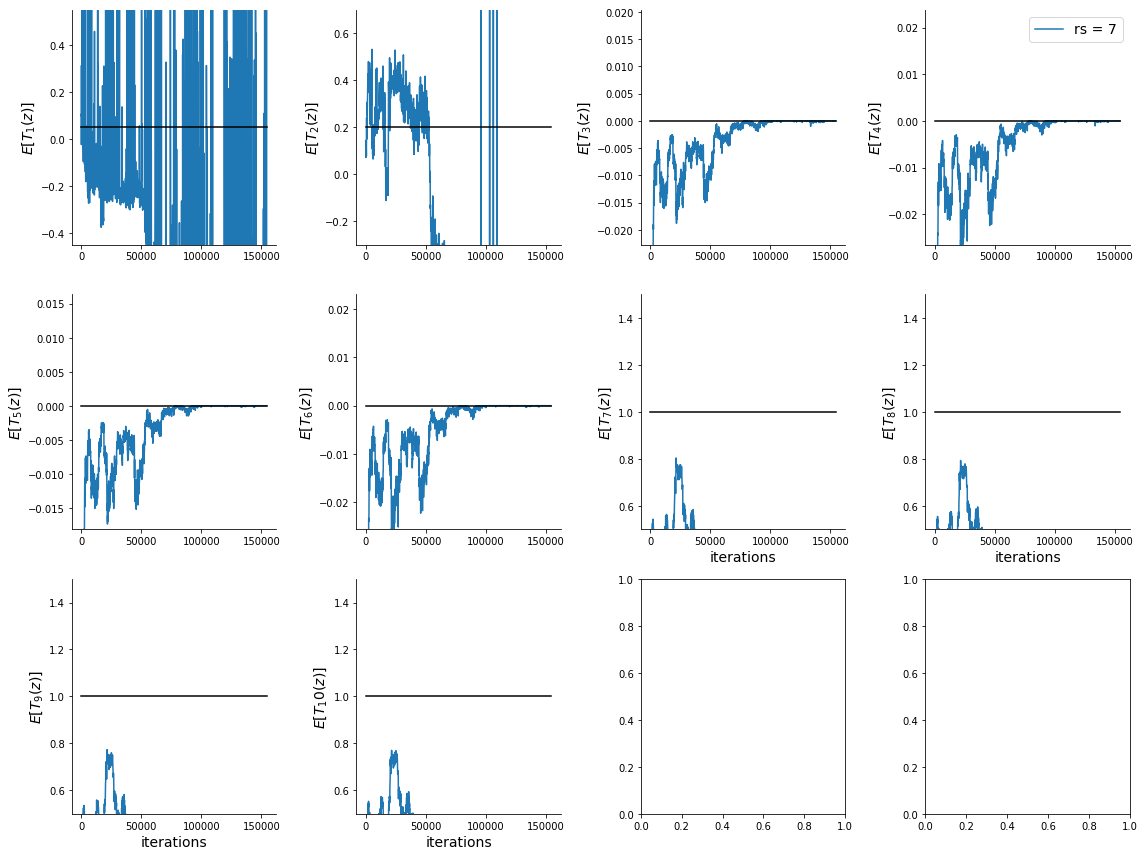

p values
0


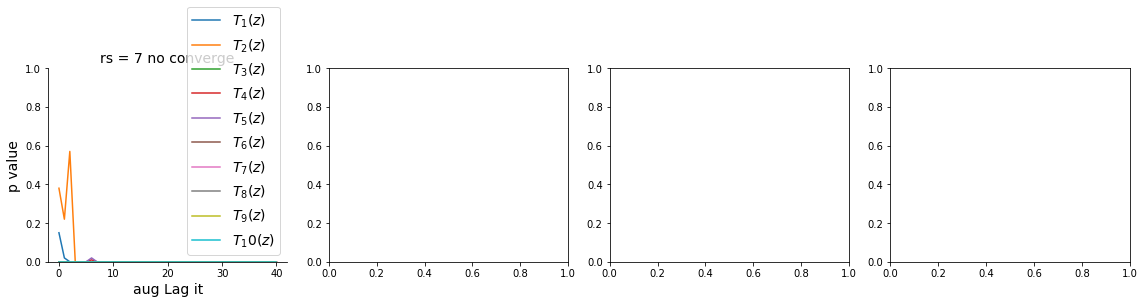

batch_size 561
c 8.822750861925279
sigma 5.37
AL_fac 6.246845532444792
max_iters 10480
[12]
0 1959


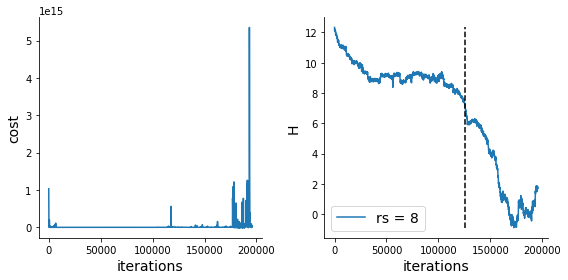

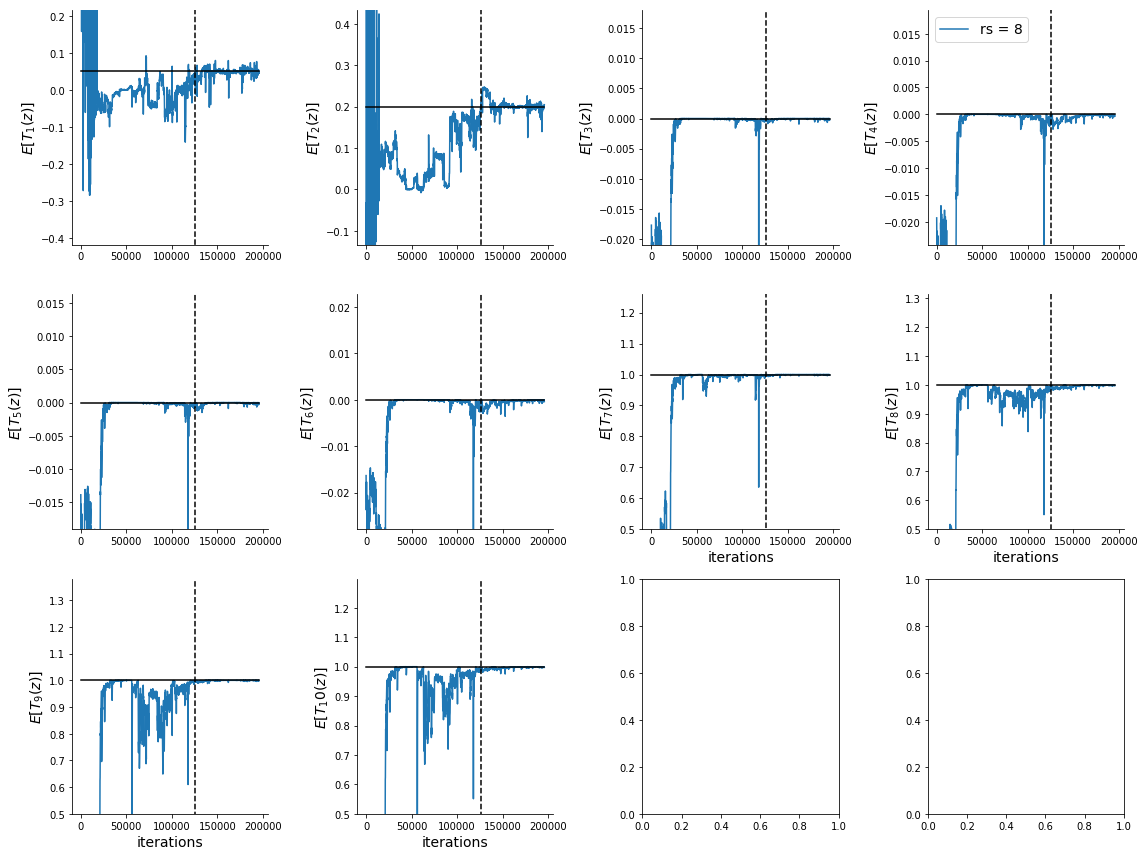

p values
0


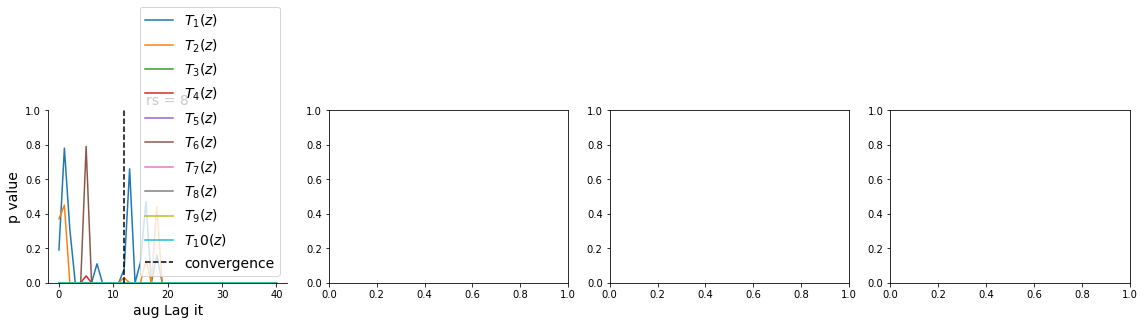

batch_size 838
c 5.492173280283508
sigma 1.05
AL_fac 2.0603447636264276
max_iters 10014
[None]
0 1372


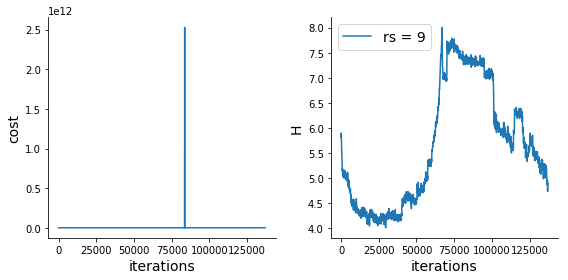

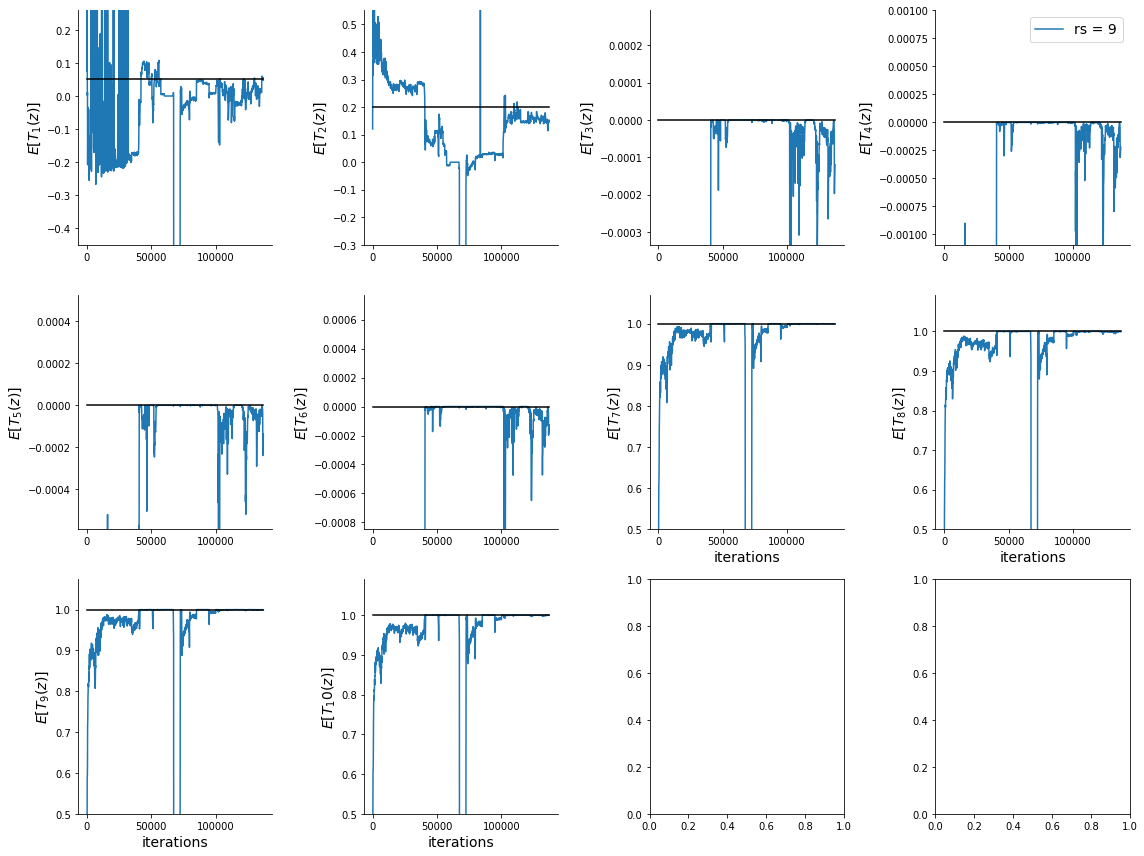

p values
0


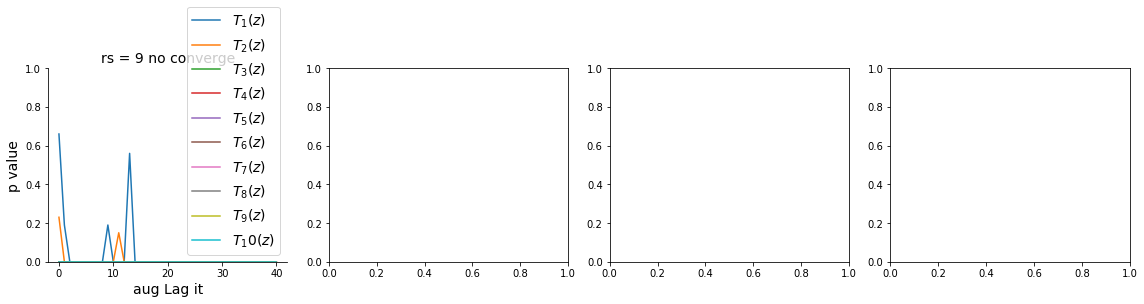

batch_size 727
c 6.702834114336479
sigma 4.86
AL_fac 7.990431060308895
max_iters 15201
[None]
0 1560


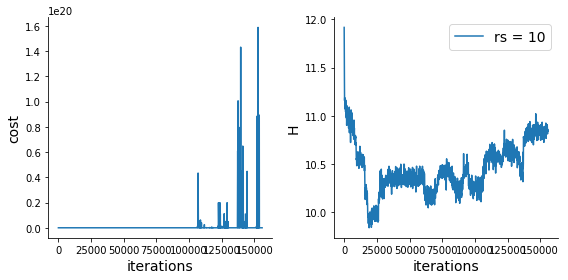

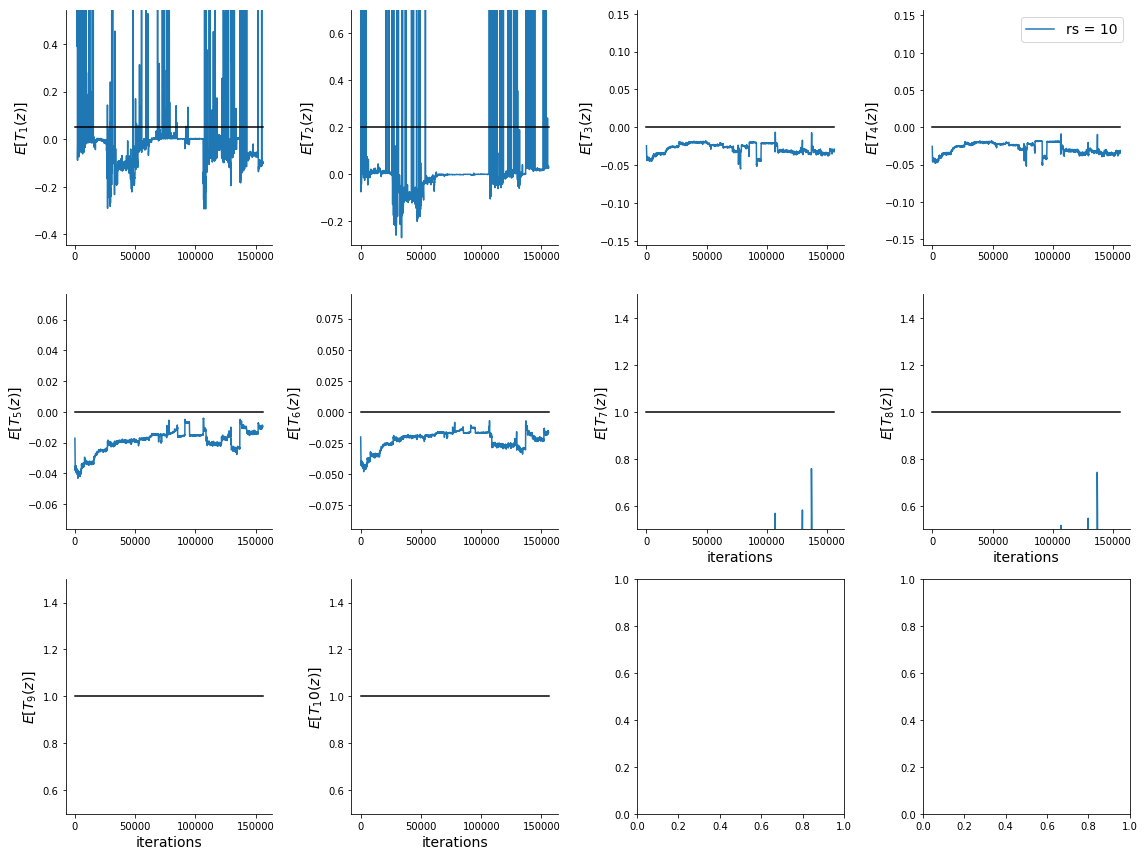

p values
0


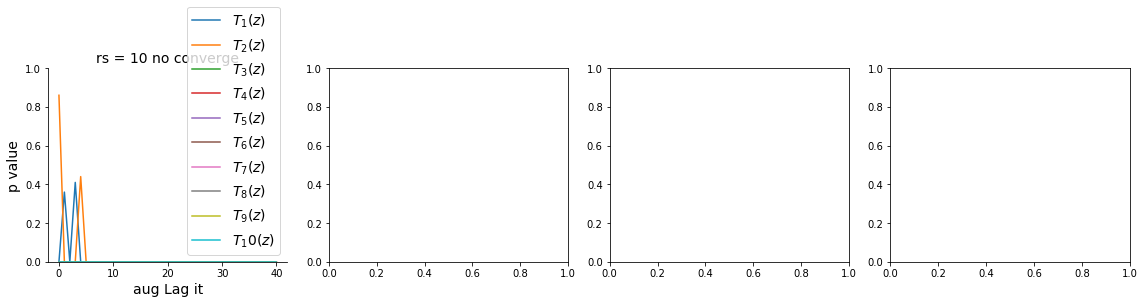

In [7]:
EPS = 1e-16

dirstr = 'SC_test_randsearch'

# create an instance of the V1_circuit system class
fixed_params = {'E_constant':0.0, \
                'E_Pbias':0.1, \
                'E_Prule':0.5, \
                'E_Arule':0.5, \
                'E_choice':-0.2, \
                'E_light':0.1};

C = 4
p_NI = 0.8
p_DI = 0.6

err_inc_P = 0.05
err_inc_A = 0.2

behavior_type = "inforoute"

if (C==1):
    means = np.array([p_NI, 0.0, 1.0])
    tol = np.array([0.01, 0.025, 0.01])
elif (C==2):
    means = np.array([p_NI, p_DI, 0.0, 0.0, 1.0, 1.0])
    tol = np.array([0.01, 0.01, 0.025, 0.025, 0.01, 0.01])
elif (C==4):
    means = np.array([err_inc_P, err_inc_A, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0])
    tol = np.array([0.015, 0.015, 0.025, 0.025, 0.025, 0.025, 0.01, 0.01, 0.01, 0.01])

behavior = {
    "type": behavior_type,
    "means": means,
}

model_opts = {'params':'reduced', 'C':C}

system = SCCircuit(fixed_params, behavior, model_opts=model_opts)

# normalizing flow layer architecture
TIF_flow_type = 'PlanarFlowLayer'
# number of layers
nlayers = 10
mult_and_shift = 'post'
arch_dict = {'D':system.D, \
             'latent_dynamics':None, \
             'mult_and_shift':mult_and_shift, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};
lr_order = -3

start_rs = 1
num_rs = 10
random_seeds = np.arange(start_rs, num_rs+start_rs)

basedir = '/Users/sbittner/Documents/dsn/dsn/'
fnames = []
legendstrs = []
AL_final_its = []
for i in range(num_rs):
    random_seed = random_seeds[i]
    dsndir = basedir + get_savedir(system, arch_dict, None, None, None, random_seed, dirstr, randsearch=True)
    fname = dsndir + 'opt_info.npz'
    fnames.append(dsndir + 'opt_info.npz')
    legendstr = 'rs = %d' % random_seed
    legendstrs.append(legendstr)
    npzfile = np.load(fname)
    behavior_i = npzfile['behavior'][()]
    cs_i = npzfile['cs']
    k_max = len(cs_i)
    #AL_final_its.append(k_max-1)
    frac_samps = 0.5
    print('batch_size', npzfile['n'])
    print('c', npzfile['c_init_order'])
    print('sigma', npzfile['sigma_init'])
    print('AL_fac', npzfile['AL_fac'])
    print('max_iters', npzfile['max_iters'])
    figs, _AL_final_its, p_values = plot_opt([fname], [legendstr], con_method='2', maxconlim=0.5, tol=tol)
    AL_final_its.append(_AL_final_its[0])

In [8]:
print(AL_final_its)

[None, None, None, None, None, None, None, 12, None, None]


rs = 1 has not converged so not plotting.
rs = 2 has not converged so not plotting.
rs = 3 has not converged so not plotting.
rs = 4 has not converged so not plotting.
rs = 5 has not converged so not plotting.
rs = 6 has not converged so not plotting.
rs = 7 has not converged so not plotting.
rs = 9 has not converged so not plotting.
rs = 10 has not converged so not plotting.


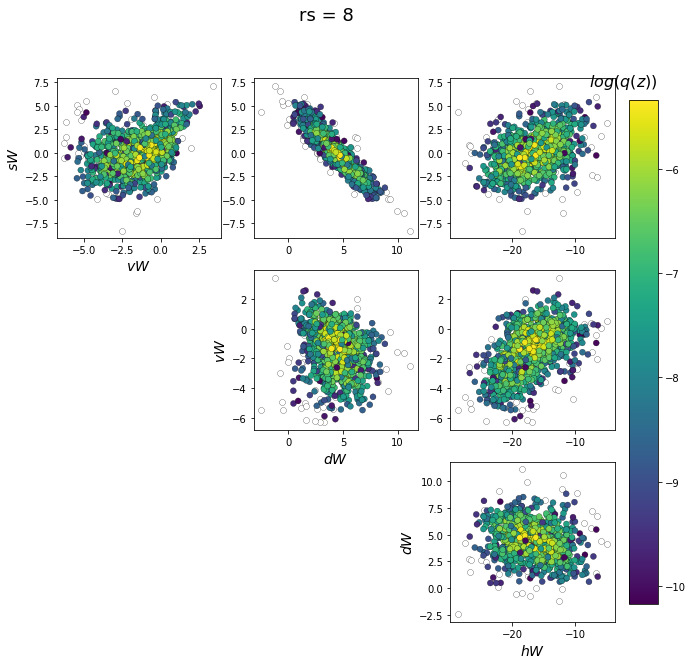

In [9]:
#pfnames = ['images/Z_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
Zs = dsn_pairplots(fnames, 'Zs', system, system.D, f_str='identity', \
              c_str='log_q_z', legendstrs=legendstrs, AL_final_its=AL_final_its, \
              fontsize=14, ellipses=False, tri=True) #3, pfnames=pfnames)


rs = 1 has not converged so not plotting.
rs = 2 has not converged so not plotting.
rs = 3 has not converged so not plotting.
rs = 4 has not converged so not plotting.
rs = 5 has not converged so not plotting.
rs = 6 has not converged so not plotting.
rs = 7 has not converged so not plotting.
rs = 9 has not converged so not plotting.
rs = 10 has not converged so not plotting.


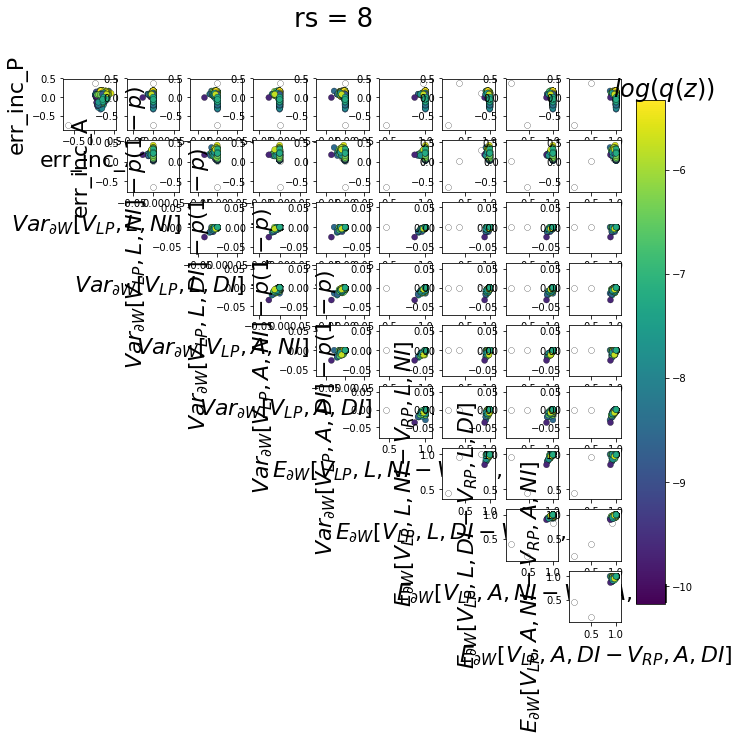

In [10]:
#pfnames = ['images/T_x_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
T_xs = dsn_pairplots(fnames, 'T_xs', system, system.num_suff_stats, f_str='identity', \
              c_str='log_q_z', legendstrs=legendstrs, AL_final_its=AL_final_its, \
              fontsize=22, ellipses=False, tri=True) #, pfnames=pfnames)        

